# Practical example

## Importing the relevant libraries

In [62]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [92]:
raw_data = pd.read_csv('1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4


## Preprocessing

### Exploring the descriptive statistics of the variables

In [93]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00,4345
unique,7,nan,6,nan,nan,4,2,nan,312
top,Volkswagen,nan,sedan,nan,nan,Diesel,yes,nan,E-Class
freq,936,nan,1649,nan,nan,2019,3947,nan,199
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55,NaN
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00,NaN
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00,NaN


### Determining the variables of interest

In [94]:
data = raw_data

### Dealing with missing values

In [95]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [96]:
data_no_mv = data.dropna(axis=0)

In [97]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.00,4025,4025.00,4025.00,4025,4025,4025.00,4025
unique,7,nan,6,nan,nan,4,2,nan,306
top,Volkswagen,nan,sedan,nan,nan,Diesel,yes,nan,E-Class
freq,880,nan,1534,nan,nan,1861,3654,nan,188
mean,NaN,19552.31,NaN,163.57,2.76,NaN,NaN,2006.38,NaN
std,NaN,25815.73,NaN,103.39,4.94,NaN,NaN,6.70,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,6999.00,NaN,90.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11500.00,NaN,158.00,2.20,NaN,NaN,2007.00,NaN
75%,NaN,21900.00,NaN,230.00,3.00,NaN,NaN,2012.00,NaN


### Exploring the PDFs

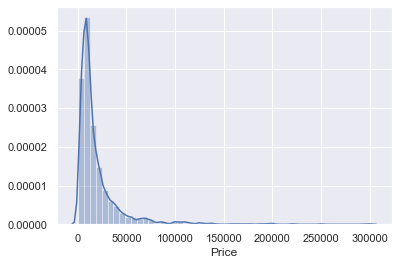

In [98]:
sns.distplot(data_no_mv['Price'])

### Dealing with outliers

In [99]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3984,3984.00,3984,3984.00,3984.00,3984,3984,3984.00,3984
unique,7,nan,6,nan,nan,4,2,nan,302
top,Volkswagen,nan,sedan,nan,nan,Diesel,yes,nan,E-Class
freq,880,nan,1528,nan,nan,1853,3613,nan,188
mean,NaN,17837.12,NaN,165.12,2.74,NaN,NaN,2006.29,NaN
std,NaN,18976.27,NaN,102.77,4.96,NaN,NaN,6.67,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,6980.00,NaN,93.00,1.80,NaN,NaN,2002.75,NaN
50%,NaN,11400.00,NaN,160.00,2.20,NaN,NaN,2007.00,NaN
75%,NaN,21000.00,NaN,230.00,3.00,NaN,NaN,2011.00,NaN


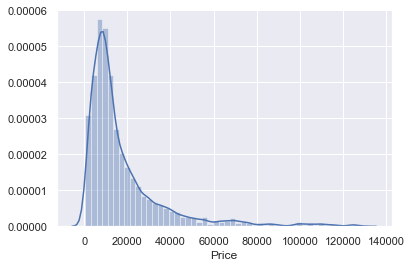

In [100]:
sns.distplot(data_1['Price'])

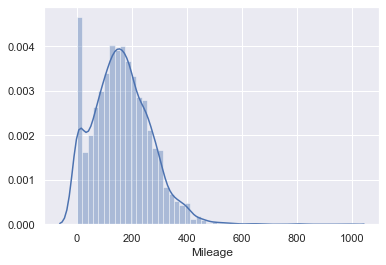

In [101]:
sns.distplot(data_no_mv['Mileage'])

In [102]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

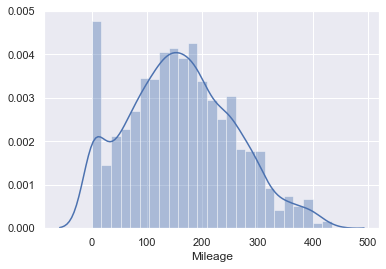

In [103]:
sns.distplot(data_2['Mileage'])

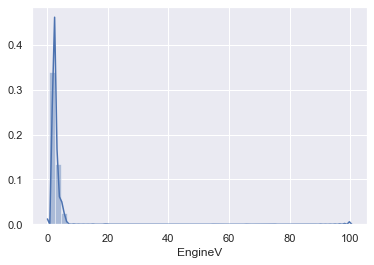

In [104]:
sns.distplot(data_no_mv['EngineV'])

In [105]:
data_3 = data_2[data_2['EngineV']<6.5]

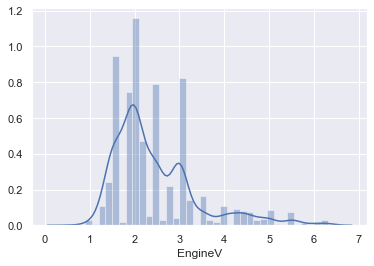

In [106]:
sns.distplot(data_3['EngineV'])

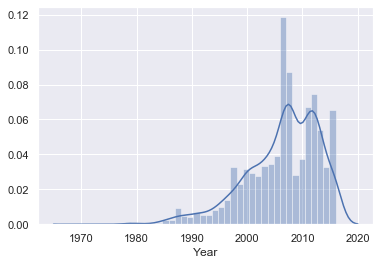

In [107]:
sns.distplot(data_no_mv['Year'])

In [108]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

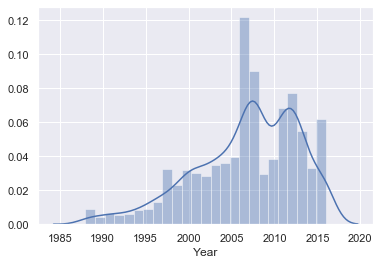

In [109]:
sns.distplot(data_4['Year'])

In [110]:
data_cleaned = data_4.reset_index(drop=True)

In [111]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3867,3867.00,3867,3867.00,3867.00,3867,3867,3867.00,3867
unique,7,nan,6,nan,nan,4,2,nan,291
top,Volkswagen,nan,sedan,nan,nan,Diesel,yes,nan,E-Class
freq,848,nan,1467,nan,nan,1807,3505,nan,181
mean,NaN,18194.46,NaN,160.54,2.45,NaN,NaN,2006.71,NaN
std,NaN,19085.86,NaN,95.63,0.95,NaN,NaN,6.10,NaN
min,NaN,800.00,NaN,0.00,0.60,NaN,NaN,1988.00,NaN
25%,NaN,7200.00,NaN,91.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11700.00,NaN,157.00,2.20,NaN,NaN,2008.00,NaN
75%,NaN,21700.00,NaN,225.00,3.00,NaN,NaN,2012.00,NaN


## Checking the OLS assumptions

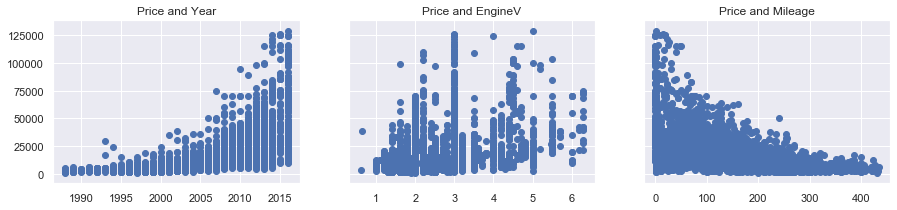

In [112]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

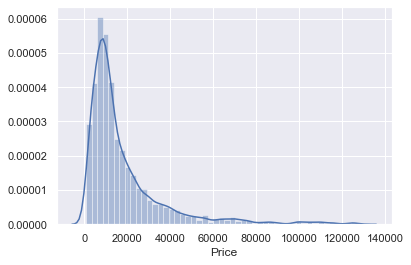

In [113]:
sns.distplot(data_cleaned['Price'])

### Relaxing the assumptions

In [26]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656
...,...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter),9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535,8.779557


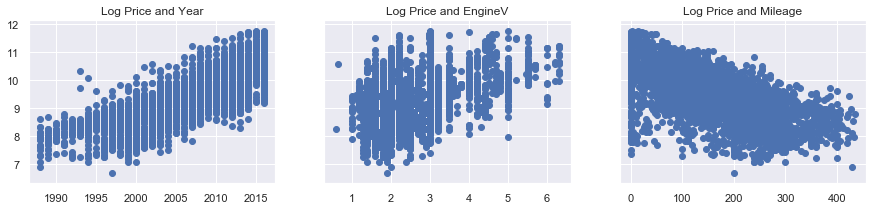

In [27]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

In [85]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)

### Multicollinearity

In [114]:
data_cleaned.columns.values

array(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model'], dtype=object)

In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [116]:
vif

,VIF,features
0,3.79,Mileage
1,10.35,Year
2,7.66,EngineV


In [117]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

## Create dummy variables

In [118]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [119]:
data_with_dummies.head()

,Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,4200.00,277,2.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7900.00,427,2.90,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13300.00,358,5.00,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23000.00,240,4.20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18300.00,120,2.00,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Rearrange a bit

In [35]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_11', 'Model_116', 'Model_118', 'Model_120',
       'Model_19', 'Model_190', 'Model_200', 'Model_210', 'Model_220',
       'Model_230', 'Model_25', 'Model_250', 'Model_300', 'Model_316',
       'Model_318', 'Model_320', 'Model_323', 'Model_325', 'Model_328',
       'Model_330', 'Model_335', 'Model_4 Series Gran Coupe', 'Model_428',
       'Model_4Runner', 'Model_5 Series', 'Model_5 Series GT',
       'Model_520', 'Model_523', 'Model_524', 'Model_525', 'Model_528',
       'Model_530', 'Model_535', 'Model_540', 'Model_545', 'Model_550',
       'Model_6 Series Gran Coupe', 'Model_630', 'Model_640', 'Model_645',
       'Model_650', 'Model_73

In [120]:
cols = ['Mileage', 'EngineV', 'Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_11', 'Model_116', 'Model_118', 'Model_120',
       'Model_19', 'Model_190', 'Model_200', 'Model_210', 'Model_220',
       'Model_230', 'Model_25', 'Model_250', 'Model_300', 'Model_316',
       'Model_318', 'Model_320', 'Model_323', 'Model_325', 'Model_328',
       'Model_330', 'Model_335', 'Model_4 Series Gran Coupe', 'Model_428',
       'Model_4Runner', 'Model_5 Series', 'Model_5 Series GT',
       'Model_520', 'Model_523', 'Model_524', 'Model_525', 'Model_528',
       'Model_530', 'Model_535', 'Model_540', 'Model_545', 'Model_550',
       'Model_6 Series Gran Coupe', 'Model_630', 'Model_640', 'Model_645',
       'Model_650', 'Model_730', 'Model_735', 'Model_740', 'Model_745',
       'Model_750', 'Model_760', 'Model_80', 'Model_9', 'Model_90',
       'Model_A 140', 'Model_A 150', 'Model_A 170', 'Model_A 180',
       'Model_A1', 'Model_A3', 'Model_A4', 'Model_A4 Allroad', 'Model_A5',
       'Model_A6', 'Model_A6 Allroad', 'Model_A7', 'Model_A8',
       'Model_ASX', 'Model_Amarok', 'Model_Auris', 'Model_Avalon',
       'Model_Avensis', 'Model_Aygo', 'Model_B 170', 'Model_B 180',
       'Model_B 200', 'Model_Beetle', 'Model_Bora', 'Model_C-Class',
       'Model_CL 180', 'Model_CL 500', 'Model_CL 55 AMG', 'Model_CL 550',
       'Model_CL 63 AMG', 'Model_CLA 200', 'Model_CLA 220',
       'Model_CLA-Class', 'Model_CLC 180', 'Model_CLC 200',
       'Model_CLK 200', 'Model_CLK 220', 'Model_CLK 230', 'Model_CLK 240',
       'Model_CLK 280', 'Model_CLK 320', 'Model_CLK 430', 'Model_CLS 350',
       'Model_CLS 400', 'Model_CLS 500', 'Model_CLS 63 AMG',
       'Model_Caddy', 'Model_Camry', 'Model_Captur', 'Model_Caravelle',
       'Model_Carina', 'Model_Carisma', 'Model_Celica', 'Model_Clio',
       'Model_Colt', 'Model_Corolla', 'Model_Corolla Verso',
       'Model_Cross Touran', 'Model_Dokker', 'Model_Duster',
       'Model_E-Class', 'Model_Eclipse', 'Model_Eos', 'Model_Espace',
       'Model_FJ Cruiser', 'Model_Fluence', 'Model_Fortuner',
       'Model_G 320', 'Model_G 350', 'Model_G 500', 'Model_G 55 AMG',
       'Model_G 63 AMG', 'Model_GL 320', 'Model_GL 350', 'Model_GL 420',
       'Model_GL 450', 'Model_GL 500', 'Model_GL 550', 'Model_GLC-Class',
       'Model_GLE-Class', 'Model_GLK 220', 'Model_GLK 300',
       'Model_GLS 350', 'Model_GLS 400', 'Model_Galant', 'Model_Golf GTI',
       'Model_Golf II', 'Model_Golf III', 'Model_Golf IV',
       'Model_Golf Plus', 'Model_Golf V', 'Model_Golf VI',
       'Model_Golf VII', 'Model_Golf Variant', 'Model_Grand Scenic',
       'Model_Grandis', 'Model_Hiace', 'Model_Highlander', 'Model_Hilux',
       'Model_I3', 'Model_IQ', 'Model_Jetta', 'Model_Kangoo',
       'Model_Koleos', 'Model_L 200', 'Model_LT', 'Model_Laguna',
       'Model_Lancer', 'Model_Lancer Evolution', 'Model_Lancer X',
       'Model_Lancer X Sportback', 'Model_Land Cruiser 100',
       'Model_Land Cruiser 105', 'Model_Land Cruiser 200',
       'Model_Land Cruiser 76', 'Model_Land Cruiser 80',
       'Model_Land Cruiser Prado', 'Model_Latitude', 'Model_Logan',
       'Model_Lupo', 'Model_M5', 'Model_M6', 'Model_MB', 'Model_ML 250',
       'Model_ML 270', 'Model_ML 280', 'Model_ML 320', 'Model_ML 350',
       'Model_ML 400', 'Model_ML 430', 'Model_ML 500', 'Model_ML 550',
       'Model_ML 63 AMG', 'Model_Master', 'Model_Matrix', 'Model_Megane',
       'Model_Modus', 'Model_Multivan', 'Model_New Beetle',
       'Model_Outlander', 'Model_Outlander XL', 'Model_Pajero',
       'Model_Pajero Pinin', 'Model_Pajero Sport', 'Model_Pajero Wagon',
       'Model_Passat B3', 'Model_Passat B4', 'Model_Passat B5',
       'Model_Passat B6', 'Model_Passat B7', 'Model_Passat B8',
       'Model_Passat CC', 'Model_Phaeton', 'Model_Pointer', 'Model_Polo',
       'Model_Previa', 'Model_Prius', 'Model_Q3', 'Model_Q5', 'Model_Q7',
       'Model_R 320', 'Model_R8', 'Model_Rav 4', 'Model_S 140',
       'Model_S 250', 'Model_S 300', 'Model_S 320', 'Model_S 350',
       'Model_S 400', 'Model_S 430', 'Model_S 500', 'Model_S 550',
       'Model_S 600', 'Model_S 63 AMG', 'Model_S 65 AMG', 'Model_S4',
       'Model_S5', 'Model_S8', 'Model_SL 500 (550)', 'Model_SL 55 AMG',
       'Model_SLK 200', 'Model_SLK 350', 'Model_Sandero',
       'Model_Sandero StepWay', 'Model_Scenic', 'Model_Scion',
       'Model_Scirocco', 'Model_Sequoia', 'Model_Sharan', 'Model_Sienna',
       'Model_Smart', 'Model_Space Star', 'Model_Space Wagon',
       'Model_Sprinter 208', 'Model_Sprinter 210', 'Model_Sprinter 211',
       'Model_Sprinter 212', 'Model_Sprinter 213', 'Model_Sprinter 311',
       'Model_Sprinter 312', 'Model_Sprinter 313', 'Model_Sprinter 315',
       'Model_Sprinter 316', 'Model_Sprinter 318', 'Model_Sprinter 319',
       'Model_Symbol', 'Model_Syncro', 'Model_T3 (Transporter)',
       'Model_T4 (Transporter)', 'Model_T4 (Transporter) ',
       'Model_T5 (Transporter)', 'Model_T5 (Transporter) ',
       'Model_T6 (Transporter)', 'Model_T6 (Transporter) ', 'Model_TT',
       'Model_Tacoma', 'Model_Tiguan', 'Model_Touareg', 'Model_Touran',
       'Model_Trafic', 'Model_Tundra', 'Model_Up', 'Model_V 250',
       'Model_Vaneo', 'Model_Vento', 'Model_Venza', 'Model_Viano',
       'Model_Virage', 'Model_Vista', 'Model_Vito', 'Model_X1',
       'Model_X3', 'Model_X5', 'Model_X5 M', 'Model_X6', 'Model_X6 M',
       'Model_Yaris', 'Model_Z3', 'Model_Z4']

In [121]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,Mileage,EngineV,Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,277,2.00,4200.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,427,2.90,7900.00,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,358,5.00,13300.00,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,240,4.20,23000.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,120,2.00,18300.00,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Linear regression model

### Declare the inputs and the targets

In [122]:
targets = data_preprocessed['Price']
inputs = data_preprocessed.drop(['Price'],axis=1)

### Scale the data

In [123]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [124]:
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [125]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the regression

In [126]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [127]:
y_hat = reg.predict(x_train)

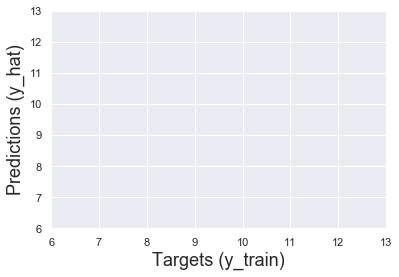

In [128]:
plt.scatter(y_train, y_hat, alpha =0.2)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

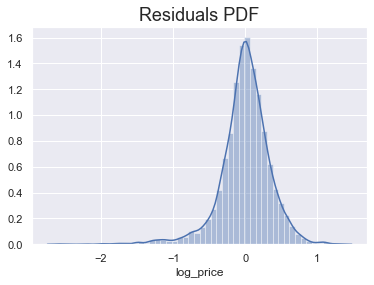

In [46]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [47]:
reg.score(x_train,y_train)

0.83910573121529

### Finding the weights and bias

In [48]:
reg.intercept_

655716015395.726

In [49]:
reg.coef_

array([-3.61116186e-01,  2.59340531e-02, -1.08128299e+12, -1.16510985e+12,
       -1.26650401e+12,  7.46314149e+11,  1.21843494e+12,  3.94061422e+11,
       -5.69592332e-02, -1.30615234e-02, -6.46743774e-02, -5.32226562e-02,
       -2.08587646e-02, -1.00341797e-01, -2.69165039e-02, -1.20300293e-01,
        3.13293457e-01, -1.82710023e+11,  3.58013021e+12,  3.66973877e-02,
        3.72238159e-02, -1.74407959e-02, -1.20693692e+11,  1.57470703e-02,
        1.81655884e-02,  2.42528915e-02,  1.68113708e-02,  9.76562500e-03,
       -8.53543676e+10,  1.18789673e-02, -9.70458984e-03,  2.09598541e-02,
        5.74226379e-02,  1.15234375e-01,  7.93952766e+10,  2.87551880e-02,
        3.52630615e-02,  4.90646362e-02,  1.23108234e+12,  2.52914429e-02,
        2.83317566e-02,  6.28745159e+12,  2.72827148e-02,  4.26635742e-02,
        1.63726807e-01,  5.42449951e-02,  1.82039505e+12,  7.41043091e-02,
        6.42471313e-02,  1.11724854e-01,  8.56170654e-02,  3.14025879e-02,
        6.27989352e+12,  

In [50]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-3.611162e-01
1,EngineV,2.593405e-02
2,Brand_BMW,-1.081283e+12
3,Brand_Mercedes-Benz,-1.165110e+12
4,Brand_Mitsubishi,-1.266504e+12
...,...,...
302,Model_X6,1.716919e-01
303,Model_X6 M,5.653381e-02
304,Model_Yaris,-3.950120e+11
305,Model_Z3,1.361465e-02


In [51]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

## Testing

In [52]:
y_hat_test = reg.predict(x_test)

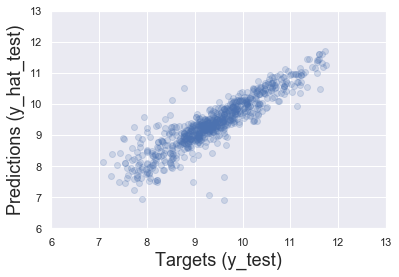

In [53]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [54]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

C:\Users\natha\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


,Prediction
0,1.031226e+04
1,inf
2,4.024560e+03
3,7.146583e+03
4,1.132580e+04


In [55]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,1.031226e+04,NaN
1,inf,7900.0
2,4.024560e+03,NaN
3,7.146583e+03,NaN
4,1.132580e+04,NaN
...,...,...
769,3.641761e+04,6950.0
770,8.760453e+03,NaN
771,1.375691e+04,NaN
772,2.074000e+04,NaN


In [56]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    7.740664
1    7.937375
2    7.824046
3    8.764053
4    9.121509
Name: log_price, dtype: float64

In [57]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,1.031226e+04,2300.0
1,inf,2800.0
2,4.024560e+03,2500.0
3,7.146583e+03,6400.0
4,1.132580e+04,9150.0
...,...,...
769,3.641761e+04,29500.0
770,8.760453e+03,9600.0
771,1.375691e+04,18300.0
772,2.074000e+04,68500.0


In [58]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [59]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,1.031226e+04,2300.0,-8.012261e+03,348.359180
1,inf,2800.0,-inf,inf
2,4.024560e+03,2500.0,-1.524560e+03,60.982405
3,7.146583e+03,6400.0,-7.465832e+02,11.665363
4,1.132580e+04,9150.0,-2.175803e+03,23.779270
...,...,...,...,...
769,3.641761e+04,29500.0,-6.917606e+03,23.449512
770,8.760453e+03,9600.0,8.395467e+02,8.745278
771,1.375691e+04,18300.0,4.543085e+03,24.825602
772,2.074000e+04,68500.0,4.776000e+04,69.722632


In [60]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,7.740000e+02,774.000000,7.740000e+02,774.000000
mean,inf,18165.817106,-inf,inf
std,NaN,19967.858908,NaN,NaN
min,0.000000e+00,1200.000000,-inf,0.006364
25%,7.292877e+03,6900.000000,-2.054217e+03,8.753277
50%,1.140767e+04,11600.000000,2.111066e+02,19.627334
75%,2.047409e+04,20500.000000,2.253492e+03,36.613764
max,inf,126000.000000,7.614700e+04,inf


In [61]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
521,23501.50,23500.00,-1.50,0.01
386,8106.05,8100.00,-6.05,0.07
683,44745.23,44800.00,54.77,0.12
622,4205.36,4200.00,-5.36,0.13
36,12258.08,12300.00,41.92,0.34
266,109588.99,109999.00,410.01,0.37
311,52280.56,52055.25,-225.31,0.43
558,8362.34,8400.00,37.66,0.45
559,12068.03,11999.00,-69.03,0.58
493,5028.25,4999.00,-29.25,0.59
